1. Загрузите данные о диагностике сахарного диабета;

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


2. Разделите эти данные на тестовую и обучающую выборки;

In [9]:
Y = df.Outcome
X = df.drop(['Outcome'], axis=1)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2,
                                                    random_state=1)

3. Постройте модель классификации для определения заболевания;

In [12]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()

In [13]:
cls.fit(x_train, y_train)

C:\Users\kupri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
y_pred = cls.predict(x_test)

In [15]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[89, 10],
       [24, 31]], dtype=int64)

Text(0.5, 15.0, 'Предсказанные значения')

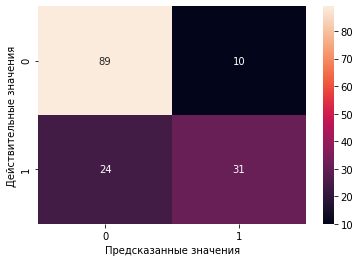

In [16]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

4. Оцените качество модели на тестовой выборке с помощью следующих метрик:
- достоверность предсказания (accuracy);
- точность (precision);
- полнота (recall);

In [17]:
metrics.accuracy_score(y_test, y_pred)

0.7792207792207793

In [24]:
metrics.precision_score(y_test, y_pred, pos_label = 0)

0.7876106194690266

In [25]:
metrics.recall_score(y_test, y_pred, pos_label = 0)

0.898989898989899

5. Сделайте вывод о применимости модели.

По оценкам достоверности, точности и полноты нашей модели трудно сказать о возможности применения данной модели в реальном мед учреждении. Более того, это не может (и не должен) делать человек, который не является его частью (желательно, глав. врачом или высоко квалифицированным работником). <br>


Сам же глав врач (или другой человек с мед образованием, имеющий высокую квалификацию, большой опыт и тд) будет принимать решение в зависимости от целей, которые стоят перед ним. </br>
- Если главной задачей будет стоять материальная состовляющая, то данного человека вряд ли смутят 10 человек, которые будут подлежать лечению, хотя больными они на самом деле не являются. Однако его также должна смутить потеря в выручке от тех 24 человек, которые были ложно названы здоровыми </br>
- Если задача (как по-хорошему и должно быть) будет состоять в том, чтобы максимально помочь больным людям, то это уже ляжет на совесть и ответсвенность этого человека, как быть с теми 24 людьми. Ведь лечить здорового все-таки лучше, чем отпустить человека, которому реально нужна помощь.

Однако тут тоже стоит отметить, что в медицинской сфере все никогда не бывает просто. На 100 правил бывает 1000 исключений. И ожидать 100% просто невозможно. А решения, ценой котрого являются человеческое здоровье всегда дается с трудом. </br>
Так что в данном случае нельзя сделать точный вывод о возможности применения данной модели в реальном мед учреждении (особенно мне). Но если понадобилось бы, то я бы ее отклонила.